JOB MARKET SKILLS FREQUENCY ANALYSER


Enter job title :(e.g., python developer, data analyst, software engineer):  python developer



Top Skills Found:
    Skill  Frequency
0  django          6
1   numpy          6
2  pandas          6
3     sql          5
4   flask          4
5  python          3


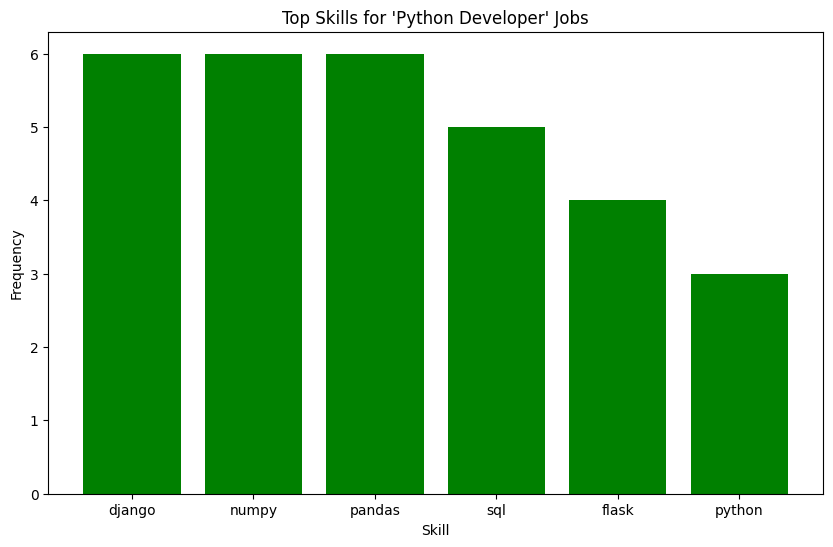

In [2]:
import random
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

print("JOB MARKET SKILLS FREQUENCY ANALYSER")

job_title = input("Enter job title :(e.g., python developer, data analyst, software engineer): ").lower()

url = "https://realpython.github.io/fake-jobs/"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

job_cards = soup.find_all("div", class_="card-content")

skills_list = []

for job in job_cards:
    title = job.find("h2", class_="title is-5").text.strip().lower()
    company = job.find("h3", class_="subtitle is-6 company").text.strip()
    location = job.find("p", class_="location").text.strip()
    


    if job_title.split()[0] in title:
        if "python" in title:
            random_skills = ["python", "flask", "django", "pandas", "numpy", "sql"]
            skills_list.extend(random.sample(random_skills,3)) 

        elif "data" in title:
            random_skills = ["sql","excel","python","statistics","mangodb"]
            skills_list.extend(random.sample(random_skills,3))
        elif "engineer" in title:
            random_skills = ["aws","linux","docker","git"]
            skills_list.extend(random.sample(random_skills,3))
        else:
            random_skills = ["communication","teamwork","problem-solving","reasoning"]
            skills_list.extend(random.sample(random_skills,3))


if not skills_list:
    print("\nNo matching job data found. Try another keyword.")

else:
    df = pd.DataFrame(skills_list, columns=["Skill"])
    skill_freq = df["Skill"].value_counts().reset_index()
    skill_freq.columns = ["Skill", "Frequency"]

    print("\nTop Skills Found:")
    print(skill_freq.head(10))

    plt.figure(figsize=(10, 6))
    plt.bar(skill_freq["Skill"].head(10), skill_freq["Frequency"].head(10), color='green')
    plt.title(f"Top Skills for '{job_title.title()}' Jobs")
    plt.xlabel("Skill")
    plt.ylabel("Frequency")
    plt.show()